In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pingouin as pg

%matplotlib inline

# Import the data

In [2]:
path_cohort_1 = '/home/ds/Ntrk2_KOs/2018_12/OF/tracking_results_of.xlsx'
df_1 = pd.read_excel(path_cohort_1)

In [3]:
path_cohort_2 = '/home/ds/Ntrk2_KOs/2019_07/OF/tracking_results_open_field.xlsx'
df_2 = pd.read_excel(path_cohort_2)

In [4]:
path_cohort_3 = '/home/ds/Ntrk2_KOs/2019_12/OF/OF_results_2019-12.xlsx'
df_3 = pd.read_excel(path_cohort_3)

In [5]:
path_cohort_4 = '/home/ds/Ntrk2_KOs/2021_08/OF/2021_08_OF_results_083-19.xlsx'
df_4 = pd.read_excel(path_cohort_4)

# Preprocessing

### Adjust column names for cohort 1 to match those of cohort 2 & 3:

In [6]:
l_correct_column_names = ['Datei', 'Nr.', 'Analyseintervall', 'von', 'bis', 'Tier Nr.', 'Gruppe', 

'Zeit I06 6_wall_u', 'Strecke I06 6_wall_u', 'Besuche I06 6_wall_u', 'Latenz I06 6_wall_u', 
'Zeit I08 8_wall_l', 'Strecke I08 8_wall_l', 'Besuche I08 8_wall_l', 'Latenz I08 8_wall_l',
'Zeit I09 9_wall_l', 'Strecke I09 9_wall_l', 'Besuche I09 9_wall_l', 'Latenz I09 9_wall_l',
'Zeit I07 7_wall_r', 'Strecke I07 7_wall_r', 'Besuche I07 7_wall_r', 'Latenz I07 7_wall_r',

'Zeit I02 2_corner_lr', 'Strecke I02 2_corner_lr', 'Besuche I02 2_corner_lr', 'Latenz I02 2_corner_lr',
'Zeit I05 5_corner_ll', 'Strecke I05 5_corner_ll', 'Besuche I05 5_corner_ll', 'Latenz I05 5_corner_ll',
'Zeit I04 4_corner_ul', 'Strecke I04 4_corner_ul', 'Besuche I04 4_corner_ul', 'Latenz I04 4_corner_ul',
'Zeit I03 3_corner_ur', 'Strecke I03 3_corner_ur', 'Besuche I03 3_corner_ur', 'Latenz I03 3_corner_ur',

'Zeit I01 01_center', 'Strecke I01 01_center', 'Besuche I01 01_center', 'Latenz I01 01_center',

'Totalzeit', 'Totalbesuche', 'Totalstrecke', 'Total%', 'Globalzeit', 'Globalstrecke', 'Globalgeschwindigkeit', 'Bewegungsschwelle', 'Minimale Aufenthaltsdauer']

In [7]:
df_1.columns = l_correct_column_names
df_1 = df_1[list(df_2.columns)]

In [8]:
l_columns_for_total = ['Zeit I01 01_center', 'Strecke I01 01_center', 'Besuche I01 01_center',
       'Latenz I01 01_center', 'Zeit I02 2_corner_lr',
       'Strecke I02 2_corner_lr', 'Besuche I02 2_corner_lr',
       'Latenz I02 2_corner_lr', 'Zeit I03 3_corner_ur',
       'Strecke I03 3_corner_ur', 'Besuche I03 3_corner_ur',
       'Latenz I03 3_corner_ur', 'Zeit I04 4_corner_ul',
       'Strecke I04 4_corner_ul', 'Besuche I04 4_corner_ul',
       'Latenz I04 4_corner_ul', 'Zeit I05 5_corner_ll',
       'Strecke I05 5_corner_ll', 'Besuche I05 5_corner_ll',
       'Latenz I05 5_corner_ll', 'Zeit I06 6_wall_u', 'Strecke I06 6_wall_u',
       'Besuche I06 6_wall_u', 'Latenz I06 6_wall_u', 'Zeit I07 7_wall_r',
       'Strecke I07 7_wall_r', 'Besuche I07 7_wall_r', 'Latenz I07 7_wall_r',
       'Zeit I08 8_wall_l', 'Strecke I08 8_wall_l', 'Besuche I08 8_wall_l',
       'Latenz I08 8_wall_l', 'Zeit I09 9_wall_l', 'Strecke I09 9_wall_l',
       'Besuche I09 9_wall_l', 'Latenz I09 9_wall_l', 'Totalzeit',
       'Totalbesuche', 'Totalstrecke']

In [9]:
l_raw_dfs = [df_1, df_2, df_3, df_4]
l_preprocessed_dfs = []

for cohort in range(4):
    # Select DataFrame and assign cohort ID:
    df = l_raw_dfs[cohort]

    # Add information about total session (=sum up all recording intervals):
    for mouse in df['Tier Nr.'].unique():
        group = df.loc[df['Tier Nr.'] ==  mouse, 'Gruppe'].values[0]
        row = df.shape[0]
        df.loc[row] = np.NaN
        df.loc[row, ['Analyseintervall', 'Tier Nr.', 'Gruppe']] = ['total', mouse, group]
        for column in l_columns_for_total:
            df.loc[row, column] = df.loc[(df['Tier Nr.'] == mouse) & (df['Analyseintervall'] != 'total'), column].sum()

    # Calculate percentage of time, visits, and distance in center:         
    df['%Zeit I01 01_center'] = df['Zeit I01 01_center'] / df['Totalzeit'] * 100
    df['%Besuche I01 01_center'] = df['Besuche I01 01_center'] / df['Totalbesuche'] * 100
    df['%Strecke I01 01_center'] = df['Strecke I01 01_center'] / df['Totalstrecke'] * 100

    # Add information about the cohort:
    df.insert(7, 'Kohorte', cohort)
    
    # Append preprocessed DataFrame to list to create Master DataFrame:
    l_preprocessed_dfs.append(df)

df = pd.concat(l_preprocessed_dfs)
df = df.reset_index(drop=True)
df.head()

,Datei,Nr.,Analyseintervall,von,bis,Tier Nr.,Gruppe,Kohorte,Zeit I01 01_center,Strecke I01 01_center,...,Totalstrecke,Total%,Globalzeit,Globalstrecke,Globalgeschwindigkeit,Bewegungsschwelle,Minimale Aufenthaltsdauer,%Zeit I01 01_center,%Besuche I01 01_center,%Strecke I01 01_center
0,C:\Users\ag_blum\Desktop\Dennis\Ntrk2 Rohr\OF\...,1,1,0.0,60000.0,#01,tg,0,4982.0,72.38,...,608.66,99.85,60015.0,608.66,10.14,4.7,100.0,8.313587,17.241379,11.891697
1,NaN,1,2,60000.0,120000.0,#01,tg,0,3299.0,46.99,...,544.73,99.91,60023.0,544.73,9.08,4.7,100.0,5.501267,16.666667,8.626292
2,NaN,1,3,120000.0,180000.0,#01,tg,0,2000.0,34.16,...,550.51,99.90,60023.0,550.51,9.17,4.7,100.0,3.335557,9.523810,6.205155
3,NaN,1,4,180000.0,240000.0,#01,tg,0,8601.0,83.45,...,355.64,99.90,60024.0,355.64,5.92,4.7,100.0,14.344324,30.000000,23.464740
4,NaN,1,5,240000.0,300000.0,#01,tg,0,5840.0,119.31,...,496.31,99.89,60039.0,496.31,8.27,4.7,100.0,9.737391,14.814815,24.039411


In [10]:
df.to_csv('OF_all_cohorts.csv')

# __Calculate stats:__

In [11]:
d_stats = {}

# List of measures (=column names) for which stats will be calculated:
l_measures = ['Totalstrecke', '%Zeit I01 01_center', '%Besuche I01 01_center', '%Strecke I01 01_center']


for measure in l_measures:
    #Setup new dictionary in d_stats:
    d_stats[measure] = {}

    # Get data:
    data_wt = list(df.loc[(df['Gruppe'] == 'wt') & (df['Analyseintervall'] == 'total'), measure].values)
    data_tg = list(df.loc[(df['Gruppe'] == 'wt') & (df['Analyseintervall'] == 'total'), measure].values)
    
    # Store data for annotations in plots:
    d_stats[measure]['data_wt'] = data_wt
    d_stats[measure]['data_tg'] = data_tg
    
    # Test for normal distribution (Shapiro):
    d_stats[measure]['normality_wt'] = (pg.normality(data_wt).loc[0, 'normal'], pg.normality(data_wt).loc[0, 'pval'].round(3))
    d_stats[measure]['normality_tg'] = (pg.normality(data_tg).loc[0, 'normal'], pg.normality(data_tg).loc[0, 'pval'].round(3))


    # Test for homoscesdasticity (Levenes):
    d_stats[measure]['equal_var'] = (pg.homoscedasticity([data_wt, data_tg]).loc['levene', 'equal_var'], pg.homoscedasticity([data_wt, data_tg]).loc['levene', 'pval'].round(3))

    # Perform either parametric or non-parametric pairwise test:
    if (d_stats[measure]['normality_wt'][0] == True) & (d_stats[measure]['normality_tg'][0] == True) & (d_stats[measure]['equal_var'][0] == True):
        d_stats[measure]['pairwise_test'] = ('ttest', pg.ttest(x=data_wt, y=data_tg).loc['T-test', 'p-val'].round(4) <= 0.05, pg.ttest(x=data_wt, y=data_tg).loc['T-test', 'p-val'].round(4))
    else:
        d_stats[measure]['pairwise_test'] = ('MWU', pg.mwu(x=data_wt, y=data_tg).loc['MWU', 'p-val'].round(4) <= 0.05, pg.mwu(x=data_wt, y=data_tg).loc['MWU', 'p-val'].round(4))

# __Plot results__

In [12]:
for cohort in df['Kohorte'].unique():
    n_wts = str(df.loc[(df['Gruppe'] == 'wt') & (df['Kohorte'] == cohort), 'Tier Nr.'].unique().shape[0]).zfill(2)
    n_tgs = str(df.loc[(df['Gruppe'] == 'tg') & (df['Kohorte'] == cohort), 'Tier Nr.'].unique().shape[0]).zfill(2)
    if cohort == 0:
        print(' cohort |  wt  |  tg  ')
        print('----------------------')
    print('   {}    |  {}  |  {}  '.format(str(cohort + 1), n_wts, n_tgs))
    print('----------------------')

n_wts = str(df.loc[df['Gruppe'] == 'wt', 'Tier Nr.'].unique().shape[0])
n_tgs = str(df.loc[df['Gruppe'] == 'tg', 'Tier Nr.'].unique().shape[0])   
print(' total  |  {}  |  {}  '.format(n_wts, n_tgs))

 cohort |  wt  |  tg  
----------------------
   1    |  05  |  07  
----------------------
   2    |  10  |  10  
----------------------
   3    |  10  |  09  
----------------------
   4    |  11  |  12  
----------------------
 total  |  36  |  38  


### Setup figure design and annotate_stats function:

In [13]:
SMALL_SIZE = 16
MEDIUM_SIZE = 17
BIGGER_SIZE = 19
LINE_WIDTH = 2
SIZE = 9

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels 
plt.rc('axes', linewidth=LINE_WIDTH)     # linewidth of x and y axis
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('xtick.major', size=10)    # linewidth of x ticks
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick.major', size=10)    # linewidth of y ticks
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


def annotate_stats(key, axis, subplot):
    data_wt = d_stats[key]['data_wt']
    data_tg = d_stats[key]['data_tg']
    max_total = max([max(data_wt), max(data_tg)])
    x1, x2 = 0, 1
    y, h, col = max_total + max_total * 0.05, max_total * 0.05, 'k'
    stars = '$\it{n.s.}$'
    if d_stats[key]['pairwise_test'][2] < 0.001:
        subplot = axis.plot([x1, x2], [y+h, y+h], lw=1.5, c=col)
        stars = '***'
    elif d_stats[key]['pairwise_test'][2] < 0.01:
        subplot = axis.plot([x1, x2], [y+h, y+h], lw=1.5, c=col)
        stars = '**'
    elif d_stats[key]['pairwise_test'][2] < 0.05:
        subplot = axis.plot([x1, x2], [y+h, y+h], lw=1.5, c=col)
        stars = '*'      
    subplot = axis.text((x1+x2)*.5, max_total, stars, ha='center', va='bottom', color=col)
    labels = ['WT', '$\it{Ntrk2}$$^{+/-}$']
    axis.axes.set_xticklabels(labels)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.axes.set_ylabel('latency [s]')

## Total distance travelled:

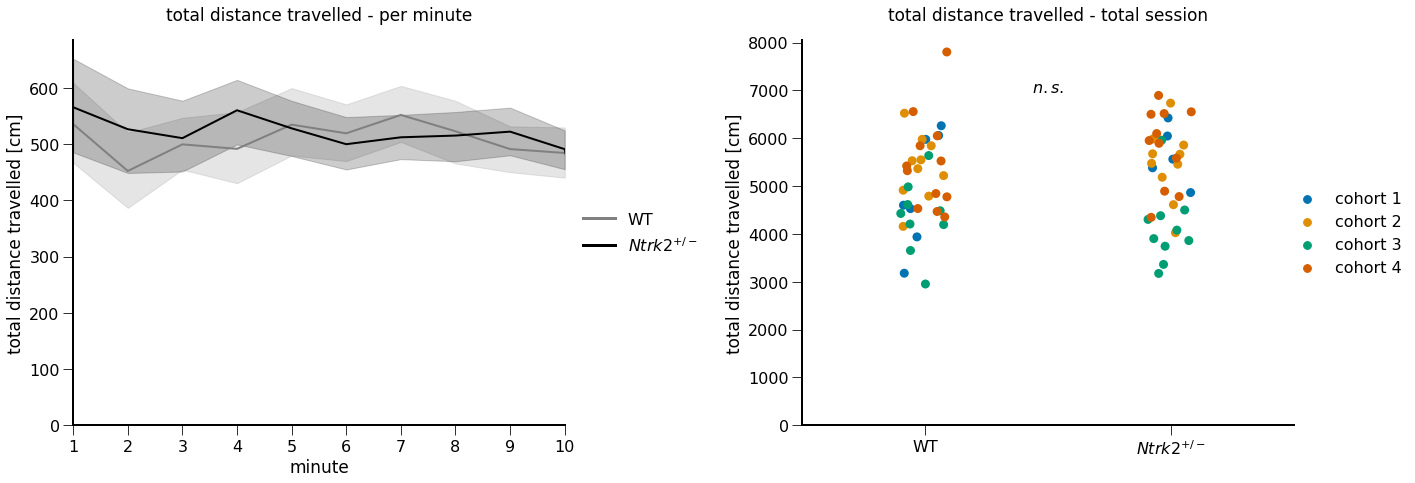

In [14]:
data_col = 'Totalstrecke'

fig = plt.figure(figsize=(20, 7), facecolor='w')
gs = fig.add_gridspec(1,2)



# Plot data for individual intervalls:
ax1 = fig.add_subplot(gs[0,0])
sns.lineplot(data=df.loc[df['Analyseintervall'] != 'total'], x='Analyseintervall', y=data_col, hue="Gruppe", palette=['gray', 'black'], ax=ax1, linewidth=2)

# Adjust axes, labels, and title:
plt.title('total distance travelled - per minute', pad = 20)
plt.ylim(0)
plt.xlim(1,10)
plt.ylabel('total distance travelled [cm]')
plt.xlabel('minute')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Adjust legend:
handles, labels = ax1.get_legend_handles_labels()
for ha in handles:
    ha = ha.set_linewidth(3)
labels = ['WT', '$\it{Ntrk2}$$^{+/-}$']
ax1.legend(handles, labels, ncol=1, frameon=False, loc='center right', bbox_to_anchor=(1.3, 0.5))



# Plot data for total session and annotate states:
ax2 = fig.add_subplot(gs[0,1])
plt_total = sns.stripplot(data=df.loc[df['Analyseintervall'] == 'total'], x='Gruppe', y=data_col, hue='Kohorte', palette='colorblind', size=SIZE, ax=ax2)
annotate_stats(data_col, ax2, plt_total)

# Adjust axes, labels, and title:
plt.title('total distance travelled - total session', pad = 20)
plt.ylabel('total distance travelled [cm]')
plt.ylim(0)
plt.xlabel('')

# Adjust legend:
plt.legend(title='')
current_handles, current_labels = plt.gca().get_legend_handles_labels()
current_labels = ['cohort 1', 'cohort 2', 'cohort 3', 'cohort 4']
ax2.legend(current_handles, current_labels, ncol=1, loc='center right', frameon=False, bbox_to_anchor=(1.25, 0.5))


# Save and display figure:
plt.tight_layout()
plt.savefig('OF_total_distance.png', dpi=300)
plt.show()


## Time in center:

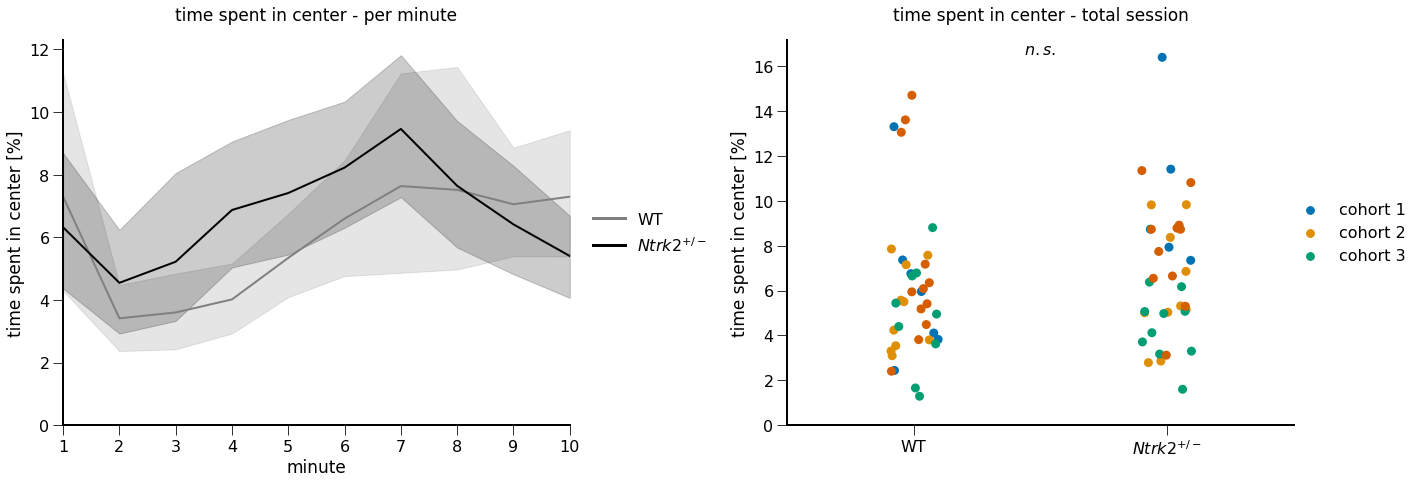

In [15]:
data_col = '%Zeit I01 01_center'

fig = plt.figure(figsize=(20, 7), facecolor='w')
gs = fig.add_gridspec(1,2)

# Plot data for individual intervalls:
ax1 = fig.add_subplot(gs[0,0])
sns.lineplot(data=df.loc[df['Analyseintervall'] != 'total'], x='Analyseintervall', y=data_col, hue="Gruppe", palette=['gray', 'black'], ax=ax1, linewidth=2)

# Adjust axes, labels, and title:
plt.title('time spent in center - per minute', pad = 20)
plt.ylim(0)
plt.xlim(1,10)
plt.ylabel('time spent in center [%]')
plt.xlabel('minute')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Adjust legend:
handles, labels = ax1.get_legend_handles_labels()
for ha in handles:
    ha = ha.set_linewidth(3)
labels = ['WT', '$\it{Ntrk2}$$^{+/-}$']
ax1.legend(handles, labels, ncol=1, frameon=False, loc='center right', bbox_to_anchor=(1.3, 0.5))



# Plot data for total session and annotate states:
ax2 = fig.add_subplot(gs[0,1])
plt_total = sns.stripplot(data=df.loc[df['Analyseintervall'] == 'total'], x='Gruppe', y=data_col, hue='Kohorte', palette='colorblind', size=SIZE, ax=ax2)
annotate_stats(data_col, ax2, plt_total)

# Adjust axes, labels, and title:
plt.title('time spent in center - total session', pad = 20)
plt.ylabel('time spent in center [%]')
plt.ylim(0)
plt.xlabel('')

# Adjust legend:
plt.legend(title='')
current_handles, current_labels = plt.gca().get_legend_handles_labels()
current_labels = ['cohort 1', 'cohort 2', 'cohort 3']
ax2.legend(current_handles, current_labels, ncol=1, loc='center right', frameon=False, bbox_to_anchor=(1.25, 0.5))



# Save and display figure:
plt.tight_layout()
plt.savefig('OF_time_in_center.png', dpi=300)
plt.show()


## Visits to center:

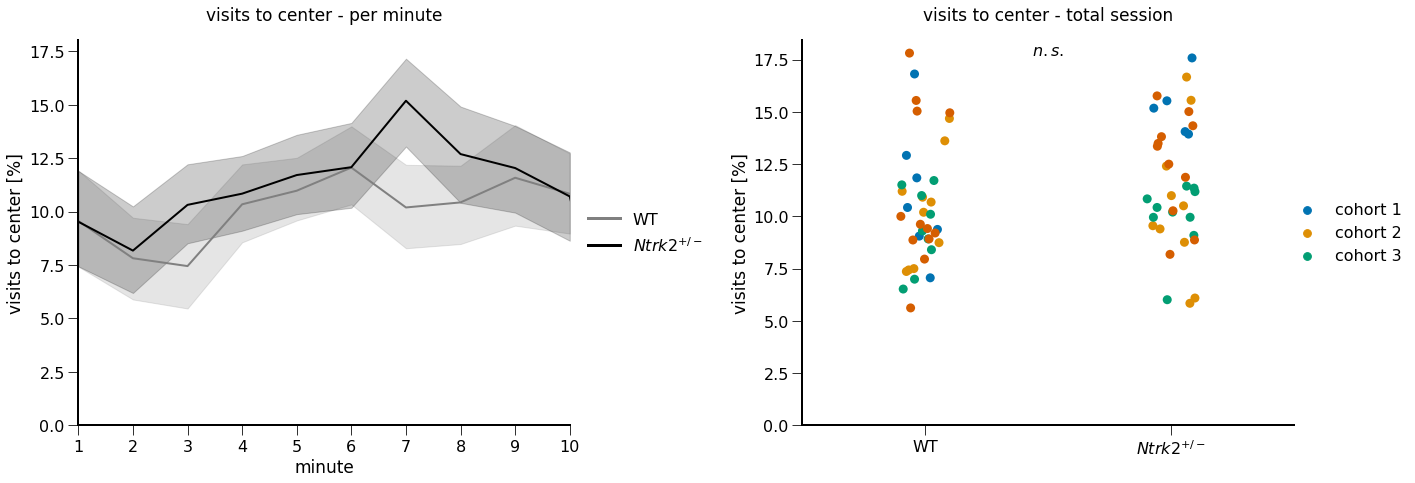

In [16]:
data_col = '%Besuche I01 01_center'

fig = plt.figure(figsize=(20, 7), facecolor='w')
gs = fig.add_gridspec(1,2)

# Plot data for individual intervalls:
ax1 = fig.add_subplot(gs[0,0])
sns.lineplot(data=df.loc[df['Analyseintervall'] != 'total'], x='Analyseintervall', y=data_col, hue="Gruppe", palette=['gray', 'black'], ax=ax1, linewidth=2)

# Adjust axes, labels, and title:
plt.title('visits to center - per minute', pad = 20)
plt.ylim(0)
plt.xlim(1,10)
plt.ylabel('visits to center [%]')
plt.xlabel('minute')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Adjust legend:
handles, labels = ax1.get_legend_handles_labels()
for ha in handles:
    ha = ha.set_linewidth(3)
labels = ['WT', '$\it{Ntrk2}$$^{+/-}$']
ax1.legend(handles, labels, ncol=1, frameon=False, loc='center right', bbox_to_anchor=(1.3, 0.5))



# Plot data for total session and annotate states:
ax2 = fig.add_subplot(gs[0,1])
plt_total = sns.stripplot(data=df.loc[df['Analyseintervall'] == 'total'], x='Gruppe', y=data_col, hue='Kohorte', palette='colorblind', size=SIZE, ax=ax2)
annotate_stats(data_col, ax2, plt_total)

# Adjust axes, labels, and title:
plt.title('visits to center - total session', pad = 20)
plt.ylabel('visits to center [%]')
plt.ylim(0)
plt.xlabel('')

# Adjust legend:
plt.legend(title='')
current_handles, current_labels = plt.gca().get_legend_handles_labels()
current_labels = ['cohort 1', 'cohort 2', 'cohort 3']
ax2.legend(current_handles, current_labels, ncol=1, loc='center right', frameon=False, bbox_to_anchor=(1.25, 0.5))



# Save and display figure:
plt.tight_layout()
plt.savefig('OF_visits_to_center.png', dpi=300)
plt.show()


## Distance in center:

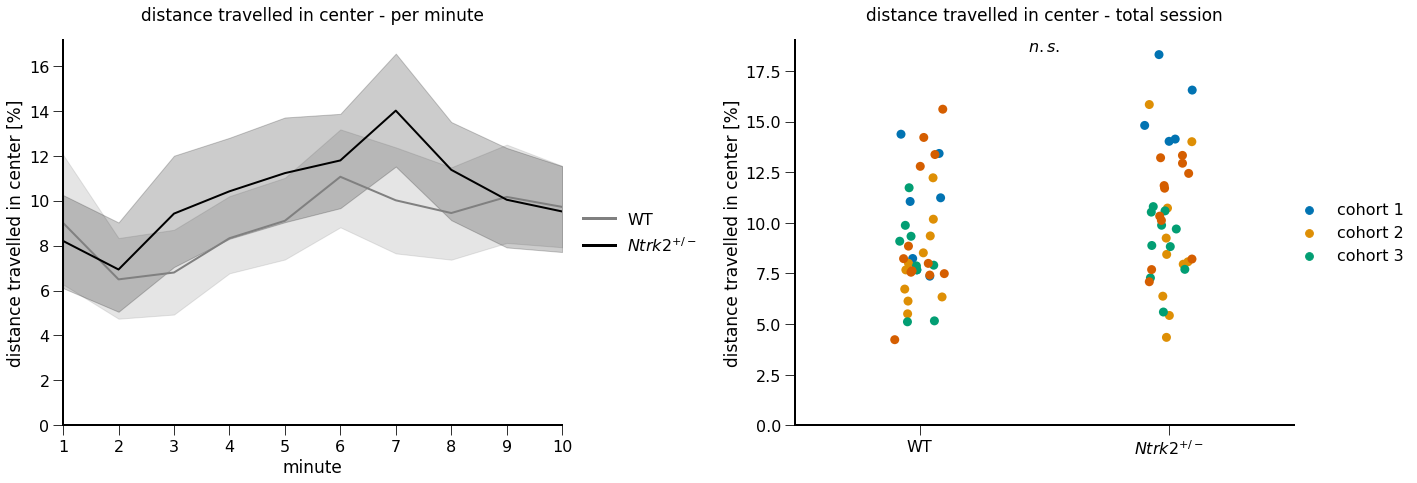

In [17]:
data_col = '%Strecke I01 01_center'

fig = plt.figure(figsize=(20, 7), facecolor='w')
gs = fig.add_gridspec(1,2)

# Plot data for individual intervalls:
ax1 = fig.add_subplot(gs[0,0])
sns.lineplot(data=df.loc[df['Analyseintervall'] != 'total'], x='Analyseintervall', y=data_col, hue="Gruppe", palette=['gray', 'black'], ax=ax1, linewidth=2)

# Adjust axes, labels, and title:
plt.title('distance travelled in center - per minute', pad = 20)
plt.ylim(0)
plt.xlim(1,10)
plt.ylabel('distance travelled in center [%]')
plt.xlabel('minute')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Adjust legend:
handles, labels = ax1.get_legend_handles_labels()
for ha in handles:
    ha = ha.set_linewidth(3)
labels = ['WT', '$\it{Ntrk2}$$^{+/-}$']
ax1.legend(handles, labels, ncol=1, frameon=False, loc='center right', bbox_to_anchor=(1.3, 0.5))



# Plot data for total session and annotate states:
ax2 = fig.add_subplot(gs[0,1])
plt_total = sns.stripplot(data=df.loc[df['Analyseintervall'] == 'total'], x='Gruppe', y=data_col, hue='Kohorte', palette='colorblind', size=SIZE, ax=ax2)
annotate_stats(data_col, ax2, plt_total)

# Adjust axes, labels, and title:
plt.title('distance travelled in center - total session', pad = 20)
plt.ylabel('distance travelled in center [%]')
plt.ylim(0)
plt.xlabel('')

# Adjust legend:
plt.legend(title='')
current_handles, current_labels = plt.gca().get_legend_handles_labels()
current_labels = ['cohort 1', 'cohort 2', 'cohort 3']
ax2.legend(current_handles, current_labels, ncol=1, loc='center right', frameon=False, bbox_to_anchor=(1.25, 0.5))



# Save and display figure:
plt.tight_layout()
plt.savefig('OF_distance_in_center.png', dpi=300)
plt.show()
